# ASP3231 Laboratory 2: Basics of Reducing CCD Images

## Prelab questions

Read this Jupyter notebook in full and then complete the following prelab questions in this Jupyter notebook, and then submit a PDF of your (still incomplete) Jupyter notebook before the start of your lab session. For this lab the first two lectures and Section 4.5 of Rieke's "Measuring the Universe" are particularly helpful.

**Prelab Question 1.** How would you take a bias, dark, and flat image at the telescope? 

**Prelab Question 2.**  In words describe the mathematical operations that we undertake on a science image when process it using the bias, dark and flat images. 

**Prelab Question 3.**  A raw science image will include contributions from the bias (offset) and dark. How does the impact of the bias and dark vary with exposure time? 

**Prelab Question 4.**  If you wanted to use astropy to determine and then print the value the OBJECT keyword in the FITS header (i.e. from the FITS metadata), what command(s) would you use? 

**You still have another prelab question - see below**

>1. <font color="Cyan">**Bias**</font> take zero second exposure with closed shutters. 
>   <font color="Cyan">**Dark**</font> Take a long 600 second exposure with the shutters closed. 
>   <font color="Cyan">**Flat**</font> Take an exposure in the twilight sky, or against an illuminated screen

>2. In general, we subtract the bias from the darks, then the bias and darks both from the offset. Finally, we divide the science exposures by the flats.

>3. The bias and dark are contributors to observed Poisson noise. Increasing the exposure time can decrease the proportional contribution of the noise and increase the signal to noise ratio. 

>4. 
```
from astropy.io import fits

with fits.open('NGC_2997_R_00005534.fits') as hdul:
    print(hdul[0].header['OBJECT'])

#### For the next prelab question we need to import libraries

In [42]:
import numpy as np
import astropy
import ccdproc
from ccdproc import CCDData, combiner
from astropy import units as u
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
import gc                                 # What does this library do?
gc.enable()

**Prelab Question 5.** Last week, you learned how to read a FITS image into a Jupyter Notebook and display it. But you may have noticed that the fits image was small and there were no axis labels, title or caption. In this task, you will need to read in and display 'M51.fits' from the Lab 2 Moodle Folder. (M51 is also known as the Whirlpool galaxy). In the following code cell and markdown cell, your TA has started writing a code to display the image and provide a caption. You will need to complete the code using the skills you learned last week and the following matplotlib tutorial. To complete this task you will to make sure that you have:
- loaded the FITS image
- change the figure size and the font size
- labeled the figure and axes
- changed the figure colourscale

Several useful resources for this quesiton include:
- https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python
- https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
- https://docs.astropy.org/en/stable/io/fits/


INFO: using the unit adu passed to the FITS reader instead of the unit nanomaggy in the FITS file. [astropy.nddata.ccddata]


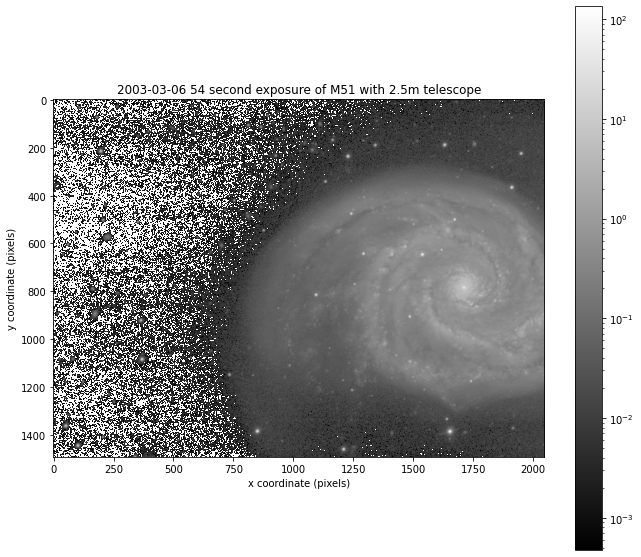

In [60]:
image_1 = CCDData.read("M51.fits", unit="adu")



fig, ax = plt.subplots(figsize = (11,10))

# Look through here to get some funky colour maps:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 
plt.rcParams.update({'font.size': 10})
plt.imshow(image_1, cmap='gray', norm=LogNorm())
plt.xlabel('x coordinate (pixels)')
plt.ylabel('y coordinate (pixels)')
plt.title('2003-03-06 54 second exposure of M51 with 2.5m telescope')
plt.colorbar()



****Figure 1**** This should be a figure caption but at the moment it is placeholder text.

## End of Pre-Lab

# Lab 2. Basics of Reducing CCD Images


### In this laboratory we will undertake the basics of data reduction (processing) of CCD images. Before the lab remind yourself what these steps are.  

By the end of this lab, you should be able to:
- take raw CCD images from a telescope and process them to produce processed science images
- be able to describe why each step is required to produce processed science images


**Task 1.** Most labs use many images, so it makes sense to create image lists rather than loading images individually. Let’s do this now. Run the following code cell. (Note that while this lab contains many tasks, most take just a minute or two although some do take longer.)

In [3]:
images = ccdproc.ImageFileCollection(".")
print(dir(images))
print(images.files)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_all_keywords', '_dict_from_fits_header', '_ext', '_filenames', '_files', '_find_fits_by_reading', '_find_keywords_by_values', '_fits_files_in_directory', '_fits_summary', '_generator', '_get_files', '_glob_exclude', '_glob_include', '_location', '_paths', '_set_column_name_case_to_match_keywords', '_summary', 'ccds', 'data', 'ext', 'files', 'files_filtered', 'filter', 'glob_exclude', 'glob_include', 'hdus', 'headers', 'keywords', 'location', 'refresh', 'sort', 'summary', 'values']
['Bias_00005290.fits', 'Bias_00005291.fits', 'Bias_00005292.fits', 'Bias_00005293.fits', 'Bias_00005294.fits', 'Bias_00005295.fits', 'Bias_00005296.fits', 'Bias_000052

 ## **STOP!** Are you remembering to take notes in this jupyter notebook? Don't forget to comment on the code that we provide for you (e.g. what do the 3 lines of code above do?)
 

This list of images includes bias, dark and flat field images, whereas we often only want to deal with one type of image (or images taken in one filter) at a time. TheSkyX software used to control the CCDs at the Monash telescopes use the header keyword PICTTYPE to denote biases, darks, flats and science images. 

**Task 2.** Filter the images for PICTTYPE=2. What type of images are these?

In [4]:
print('Printing file names')
print( images.files_filtered(PICTTYPE = 2) )

print('Printing a list of file names')
filenames = ( images.files_filtered(PICTTYPE = 2) )
print(filenames)

Printing file names
['Bias_00005290.fits' 'Bias_00005291.fits' 'Bias_00005292.fits'
 'Bias_00005293.fits' 'Bias_00005294.fits' 'Bias_00005295.fits'
 'Bias_00005296.fits' 'Bias_00005297.fits' 'Bias_00005298.fits'
 'Bias_00005299.fits']
Printing a list of file names
['Bias_00005290.fits' 'Bias_00005291.fits' 'Bias_00005292.fits'
 'Bias_00005293.fits' 'Bias_00005294.fits' 'Bias_00005295.fits'
 'Bias_00005296.fits' 'Bias_00005297.fits' 'Bias_00005298.fits'
 'Bias_00005299.fits']


# Bias

**Task 3.** Lets load all the bias frames with a single line of code. We will use a "list comprehension" to do so, which can make python very succinct compared to other languages. Run the following code cells. What do you think the various bits of this code are doing?

(For more information about for list comprehensions, here are a guide: 
https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3
)

In [5]:
biases = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 2) ]

print(len(biases), ' bias images loaded')

Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'. [astropy.wcs.wcs]
Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'.


10  bias images loaded


In [6]:
for fn in images.files_filtered( PICTTYPE = 2 ):
    print(fn)

Bias_00005290.fits
Bias_00005291.fits
Bias_00005292.fits
Bias_00005293.fits
Bias_00005294.fits
Bias_00005295.fits
Bias_00005296.fits
Bias_00005297.fits
Bias_00005298.fits
Bias_00005299.fits


**Note:** When executing loops and functions in python, the “:” and subsequent indentation (with tab) are critical, so please keep this in mind for future work. If you want to know more about loops, take a look at https://www.w3schools.com/python/python_for_loops.asp

**Task 4.**  Lets print some example pixel values. Have you figured out how to leave comments in a code cell? The simplest way is using a hash. Below we have added commend lines. Run the code cell and edit the comment lines to answer the following questions: What do these values correspond to? Which images and rows/coluns do these values come from?

In [7]:
# You can modify this example comment
print(biases)
# You can modify this example comment
print(biases[0])
# You can modify this example comment
print(biases[0][:,0])

[CCDData([[2146, 2120, 2125, ..., 2088, 2040, 2041],
         [2138, 2156, 2079, ..., 2113, 2079, 2054],
         [2166, 2149, 2055, ..., 2153, 2110, 2094],
         ...,
         [2108, 2122, 2128, ..., 2045, 2261, 2135],
         [2164, 2121, 2207, ..., 2112, 2151, 2163],
         [2156, 2175, 2131, ..., 2142, 2101, 2101]]), CCDData([[2133, 2117, 2070, ..., 2111, 2059, 2077],
         [2180, 2102, 2120, ..., 2206, 2130, 1993],
         [2221, 2187, 2089, ..., 2008, 2129, 2096],
         ...,
         [2194, 2123, 2174, ..., 2151, 2163, 2073],
         [2232, 2198, 2151, ..., 2125, 2114, 2045],
         [2155, 2148, 2153, ..., 2060, 2123, 2078]]), CCDData([[2159, 2166, 2170, ..., 2073, 2095, 2072],
         [2203, 2074, 2111, ..., 2108, 2103, 2037],
         [2147, 2108, 2074, ..., 2123, 2102, 2079],
         ...,
         [2152, 2124, 2085, ..., 2086, 2096, 2037],
         [2163, 2117, 2089, ..., 2042, 2117, 2073],
         [2161, 2235, 2151, ..., 2116, 2153, 2132]]), CCDData([[2191,

**Task 5.** Print the count statistics (mean, stdev, min & max) for the first bias image, modifying the code provided below.

In [8]:
print('Min:', np.min(biases[0]))

Min: 1829


**Task 6.** Display the first bias image below.

**Task 7.** Like in ds9, we can look at the header keywords. Run the following cell code to display the header of the 1st bias image

In [9]:
print(biases[0].header)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 1679 / length of data axis 1                          NAXIS2  =                 1268 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H BZERO   =                32768 / offset data range to that of unsigned short    BSCALE  =                    1 / default scaling factor                         OBSERVER= 'Monash C14 Observer' / SBIGFITSEXT The name of the observer          ORIGIN  = 'Monash C14'         / Description of location                        TELESCOP= 'C14     '           / SBIGFIT

**Task 8.** Let look at just one header keyword. What is this keyword and its unit?

In [10]:
print(biases[0].header['EXPTIME'])

0.0


**Task 9.** To improve the signal-to-noise of images and mitigate spurious signals (such as radiation hits) we combine images together. A median combine is relatively simple and automatically rejects spuriously high and low values that occur in just a few individual images.

A good habit to get into is to print image statistics and see if they behave as you would expect. Is this the case here?

In [11]:
bias_median = ccdproc.Combiner(biases, dtype=np.float32).median_combine()

# A good habit to get into is printing the statistics of input and output images
print('Image statistics for the median bias')

thisimage=bias_median
print('Min:', np.min(thisimage))
print('Max:', np.max(thisimage))
print('Median:', np.median(thisimage))
print('Std Dev:', np.std(thisimage))


Image statistics for the median bias
Min: 1943.5
Max: 2205.0
Median: 2017.5
Std Dev: 26.5631046295166


/opt/anaconda3/envs/obsastro2022/lib/python3.9/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


**Task 10.** Display this new image, print some example pixel values and calculate some basic statistics. How does this compare with the individual exposure you tried earlier?

 **Task 11.** Lets print the header information 

**Task 12.** Unfortunately some useful keywords are missing, so lets add them to the header manually. 

In [12]:
bias_median.meta.update(EXPTIME = 0)
bias_median.meta.update(TELESCOP = biases[0].header['TELESCOP'])
bias_median.meta.update(OBJECT = 'Bias_Median')
print(bias_median.meta)

OrderedDict([('NCOMBINE', 10), ('EXPTIME', 0), ('TELESCOP', 'C14'), ('OBJECT', 'Bias_Median')])


**Task 13.** If you are happy with the combined image than you can write it to an output FITS file.

In [13]:
bias_median.write("bias_median.fits")



**Task 14.** We can delete the individual bias data from the notebook (the raw bias FITS files will remain on disk) and use garbage collect (gc) to clear memory.

In [14]:
del(biases)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 1608


# Dark

We now need to produce an image of the dark current, as the dark current can vary from pixel to pixel. To do this we must identify the dark images, subtract the bias from them and then combine the processed dark frames together. 

**Task 15.** The first steps are very similar to those we undertook for the bias frames. Run the following cell code. What are each of these lines doing? How do these lines differ from what you used for the bias frames? 

In [17]:
images = ccdproc.ImageFileCollection(".",glob_include = 'Dark_*')
for fn in images.files_filtered(PICTTYPE = 3):
    print(fn)
darks = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 3) ]

Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'. [astropy.wcs.wcs]
Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'.


Dark_3600.000secs00002950.fits
Dark_3600.000secs00002951.fits
Dark_3600.000secs00002952.fits
Dark_3600.000secs00002953.fits
Dark_3600.000secs00002954.fits
Dark_3600.000secs00002955.fits
Dark_3600.000secs00002956.fits
Dark_3600.000secs00002957.fits
Dark_3600.000secs00002958.fits
Dark_3600.000secs00002959.fits


**Task 16.** Print some example pixel values, calculate some basic statistics for one dark image, and display one dark image. To do this you can copy & paste the commands you used for the bias images, and *modify* them accordingly. When using jupyter notebooks preserve the commands you have used in order so they can be run in sequence to reproduce your work.



**Task 17.** CCDproc has a command for bias subtraction so let’s now use it on the individual dark exposures (be warned it is possible to run this command twice and over-subtract).

In [18]:
for idx, thisimage in enumerate(darks): 
    darks[idx] = ccdproc.subtract_bias(thisimage, bias_median)

**Task 18.** Print some example pixel values, statistics and display an image. How does this all compare with what you determined for an individual dark exposure earlier? Does the change reflect what you predict in your pre-lab (Task 2)?

**Task 19.** Combine the processed dark exposures together, using the following command.


In [19]:
dark_median = ccdproc.Combiner(darks, dtype=np.float32).median_combine()

**Task 20.** Print pixel values, statistics and display dark_median. How do these values values compare with what’s measured for individual exposures?

**Task 21.** Print the header.

**Task 22.** Again, we have missing keywords, so we will add them manually and write the output image.

In [20]:
dark_median.meta.update(EXPTIME = 3600)
dark_median.meta.update(TELESCOP = 'C14')
dark_median.meta.update(OBJECT = 'Dark_Median')
dark_median.write("dark_median.fits")

**Task 23.** If you're happy with dark_median then delete the individual dark exposures (the raw FITS files will remain) and use gc to clear memory.

In [21]:
del(darks)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 1389


# Flats

Unsurprisingly, the next step is identifying the loading the flat-field images, processing them (using the bias and dark images) and then producing a median combined flat. 

**Task 24.** Run the following code cells.

In [22]:
images = ccdproc.ImageFileCollection(".")
for fn in images.files_filtered(PICTTYPE = 4):
    print(fn)

Flat_R_1.000secs00005390.fits
Flat_R_1.000secs00005391.fits
Flat_R_1.000secs00005392.fits
Flat_R_1.000secs00005393.fits
Flat_R_1.000secs00005394.fits
Flat_R_1.000secs00005395.fits
Flat_R_1.000secs00005396.fits
Flat_R_1.000secs00005397.fits
Flat_R_1.000secs00005398.fits
Flat_R_1.000secs00005399.fits


**But wait!** Each filter has a different flat-field image, so we have to deal with each filter individually. Good naming conventions help. For this lab, we will only deal with the V-band flats.

In [23]:
images = ccdproc.ImageFileCollection(".",glob_include = 'Flat_R_*')
for fn in images.files_filtered(PICTTYPE = 4):
    print(fn)
flats = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 4) ]


Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'. [astropy.wcs.wcs]
Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'.


Flat_R_1.000secs00005390.fits
Flat_R_1.000secs00005391.fits
Flat_R_1.000secs00005392.fits
Flat_R_1.000secs00005393.fits
Flat_R_1.000secs00005394.fits
Flat_R_1.000secs00005395.fits
Flat_R_1.000secs00005396.fits
Flat_R_1.000secs00005397.fits
Flat_R_1.000secs00005398.fits
Flat_R_1.000secs00005399.fits


**Task 25.** Print the counts of the first column of the first flat image and display one flate image and describe the features that you see. Also, open the fits file in ds9 to see more details. 


**Task 26.** Let's now process the individual flat field frames using the bias and dark images. After each step, print out the count of the first column of the first flat image (we have left the blank print statements in the code cell). Notice the dark subtraction has a dependence on exposure time. Why is this the case? How did the pixel values change during each data reduction step? Does this meet your expectations?

In [24]:
for idx, thisimage in enumerate(flats): 
    flats[idx] = ccdproc.subtract_bias(thisimage, bias_median)
print('You must enter text/code here')

for idx, thisimage in enumerate(flats): 
    flats[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME',
                                       exposure_unit = u.second, scale = True)
print('You must enter text/code here')  

You must enter text/code here
You must enter text/code here


**Task 27.** Lets now have a look at the median pixel count values of individual flat field exposures. Are the counts behaving as you'd expect and why?

In [25]:
for thisimage in flats:
    print('Median:', np.ma.median(thisimage.data))  

Median: 9555.374374993145
Median: 9467.415902774781
Median: 9378.409583330154
Median: 9298.890416666865
Median: 9210.397222220898
Median: 9123.899722218513
Median: 9045.41208332777
Median: 8962.384722217917
Median: 8875.892916664481
Median: 8792.888541664928


**Task 28.** What mathematical operation do we do when we flatfield correct our data? What should the typical pixel value be for a final flatfield image? Look at the lines of code below and describe what they are doing.

In [26]:
tempimages = flats.copy()
for idx, thisimage in enumerate(tempimages):
    m = 1.0 / np.ma.median(tempimages[idx])
    tempimages[idx] = tempimages[idx].multiply(m * u.adu)
FlatV_median = ccdproc.Combiner(tempimages, dtype=np.float32).median_combine()

**Task 29.** Display Flat_V median, print some example pixel values and do the basic statistics. Is the RMS for this image dominated by random fluctuations (noise) in the pixel values, by structure in the image or are you unsure? (If you’re unsure do flag this in your notebook, and consider this before next week.)



**Task 30.** Add the missing metadata and save the image.

In [27]:
FlatV_median.meta.update(EXPTIME = 1)
FlatV_median.meta.update(TELESCOP = 'C14')
FlatV_median.meta.update(OBJECT = 'Flat_R_Median')
FlatV_median.write("Flat_R_median.fits")

**Task 31.** If you think everything has worked, then delete the individual flat exposures and use gc to clear memory.

In [28]:
del(flats)
del(tempimages)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 188


# Reducing Science Images

## Now lets reduce some V-band science images, using the bias, dark and V-band flat we have created. 

**Task 32.** First step is to load the science images. How is the following code loading V-band science images (and not other data)?

In [29]:
images = ccdproc.ImageFileCollection(".",glob_include = '*_R_*')
for fn in images.files_filtered(PICTTYPE = 1):
    print(fn)
scim = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 1)]
print(scim[0])

Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'. [astropy.wcs.wcs]
Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'.


NGC_2997_R_00005534.fits
NGC_2997_R_00005535.fits
NGC_2997_R_00005536.fits
NGC_2997_R_00005537.fits
NGC_2997_R_00005538.fits
NGC_2997_R_00005617.fits
NGC_2997_R_00005618.fits
NGC_2997_R_00005619.fits
NGC_2997_R_00005620.fits
NGC_2997_R_00005621.fits
[[ 4318  4204  4327 ...  3970  3952  3921]
 [ 4260  4259  4300 ...  4079  4061  3904]
 [ 4199  4194  4063 ...  4163  4042  4008]
 ...
 [ 4255  4371  4425 ...  5912  7884 11427]
 [ 3994  4374  4065 ...  6292  9081 15447]
 [ 4114  4070  4061 ...  6611 10157 19818]]


**Task 33.** Now we process these images using the bias, dark and V-band flat. Compare the count values of the 1st column of the first image by using the print statements. What did these steps do? What are the relevant mathematical operations? If you're unsure see Section 4.5 of Rieke, "Measuring the Universe."

In [30]:
print('You must enter text/code here')

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.subtract_bias(thisimage, bias_median)
print('You must enter text/code here')

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME', 
                                      exposure_unit = u.second, scale = True)
print('You must enter text/code here')

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.flat_correct(thisimage, FlatV_median)
print('You must enter text/code here')

You must enter text/code here
You must enter text/code here
You must enter text/code here
You must enter text/code here


**Task 34.** Let’s now write these images to output files, adding the proc prefix so we don’t confuse processed images with raw images. 

In [32]:
newname = []
for fn in images.files_filtered(PICTTYPE = 1):
    newname.extend(["proc_" + fn])
    
print(newname)

# This image writes the science images out (while including some extra lines to reduce the file size)
for idx, thisimage in enumerate(scim):
    tempimages = [thisimage]
    temp = ccdproc.Combiner(tempimages,dtype=np.float32).median_combine() 
    temp.meta = thisimage.meta
    temp.write(newname[idx])
    

['proc_NGC_2997_R_00005534.fits', 'proc_NGC_2997_R_00005535.fits', 'proc_NGC_2997_R_00005536.fits', 'proc_NGC_2997_R_00005537.fits', 'proc_NGC_2997_R_00005538.fits', 'proc_NGC_2997_R_00005617.fits', 'proc_NGC_2997_R_00005618.fits', 'proc_NGC_2997_R_00005619.fits', 'proc_NGC_2997_R_00005620.fits', 'proc_NGC_2997_R_00005621.fits']


**Task 35.** You can use ds9 to display a raw science and the processed version of that image. Do that now and compare the images. Record what you see in this notebook. Are there any images you would *not* use for your science? If so, explain why.

**Task 36.** Your edited notebook should now function as a piece of code, that can go through all the steps of this lab (although it will get into trouble if it tries to overwrite images.) Move your median bias, dark and flat images, and your processed science images, to a new directory. In the Kernal window select "Restart and Clear output" and then in Cell menu selection "Run All." What happens? 

# Conclusions

Once you have completed your notebook, please save a copy for yourself and submit it via Moodle.

**Task 37.** This is optional, but feedback will help the TAs adjust the labs and questions according to the needs of the class. How long did it take you to complete it lab? Was this lab difficult? Are there any changes you would like to see that can improves your experience in this unit?